<a href="https://colab.research.google.com/github/nijinpaul/Assignments/blob/main/ASSIGNMENT_TEXT_MINING_ELON_MUSK_TWEETS_Rev_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Perform sentimental analysis on the Elon-musk tweets 

In [1]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
df=pd.read_csv('/content/Elon_musk.csv',encoding='cp1252')
df

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
df.shape

(1999, 2)

In [4]:
df.dtypes

Unnamed: 0     int64
Text          object
dtype: object

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df = [Text.strip() for Text in df.Text] # remove both the leading and the trailing characters
df = [Text for Text in df if Text] # removes empty strings, because they are considered in Python as False
df[0:10]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [7]:
# Joining the list into one string/text
text = ' '.join(df)
text

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [8]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11 I’m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It’s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['kunalb11', 'I', '’', 'm', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox']


In [11]:
len(text_tokens)

21785

In [13]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
my_stop_words.append('Its')
my_stop_words.append('http\S+')

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['kunalb11', 'I', '’', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['kunalb11', 'i', '’', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution']


In [16]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i', '’', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would']


In [17]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [18]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 I ’ alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would


In [19]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25]) # token .lemma changing to normal english so Finally became finally and MAcBook remain MacBook. TO understand rootwords like students and coders became student and coder


['kunalb11', 'I', "'", 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution']


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [28]:
pd.DataFrame(vectorizer.vocabulary_,columns=vectorizer.vocabulary_.keys())

ValueError: ignored

In [22]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(20)

,0
ðogecoin,4970
zzcool,4969
zwiebelbach,4968
zubinanary,4967
zshauladventure,4966
zone,4965
zon,4964
zogfotpik,4963
zip2,4962
zikryzamir,4961


In [23]:
print(vectorizer.vocabulary_)


{'kunalb11': 2710, 'alien': 233, 'idaacarmack': 2449, 'ray': 3621, 'trace': 4499, 'cyberpunk': 969, 'hdr': 1686, 'nextlevel': 3158, 'have': 1680, 'try': 4536, 'joerogan': 2630, 'spotify': 4116, 'great': 1620, 'interview': 2560, 'gtera27': 1639, 'doge': 1123, 'underestimate': 4669, 'teslacn': 4344, 'congratulations': 864, 'tesla': 4338, 'china': 747, 'amazing': 259, 'execution': 1336, 'last': 2729, 'year': 4938, 'now': 3198, 'next': 3157, 'even': 1308, 'happy': 1667, 'new': 3154, 'ox': 3314, 'httpstco9wfkmyu2oj': 1875, 'frodo': 1504, 'underdoge': 4668, 'all': 236, 'thought': 4423, 'would': 4914, 'fail': 1372, 'himself': 1730, 'httpstcozgxjfdzzrm': 2408, 'owensparks': 3311, 'flcnhvy': 1446, 'anonyx10': 288, 'haha': 1653, 'thank': 4381, 'indeed': 2498, 'tweets': 4559, 'definitely': 1024, 'represent': 3704, 'realworld': 3646, 'time': 4442, 'allocation': 238, 'the': 4389, 'entertaining': 1264, 'outcome': 3290, 'likely': 2789, 'givedirectly': 1591, 'just': 2658, 'send': 3890, 'agree': 202, '

In [30]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['23', '230', '24', '240am', '247teslanews', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
print(X.toarray().shape)

(16610, 4971)


#### Let's add bigrams and trigrams 

In [33]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(df)

In [34]:

bow_matrix_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 9618 stored elements in Compressed Sparse Row format>

In [35]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


###TFidf vectorizer

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 10)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(df)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['amp', 'co', 'https', 'https co', 'in', 'is', 'of', 'spacex', 'the', 'to']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


###Generate Wordcloud

In [38]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

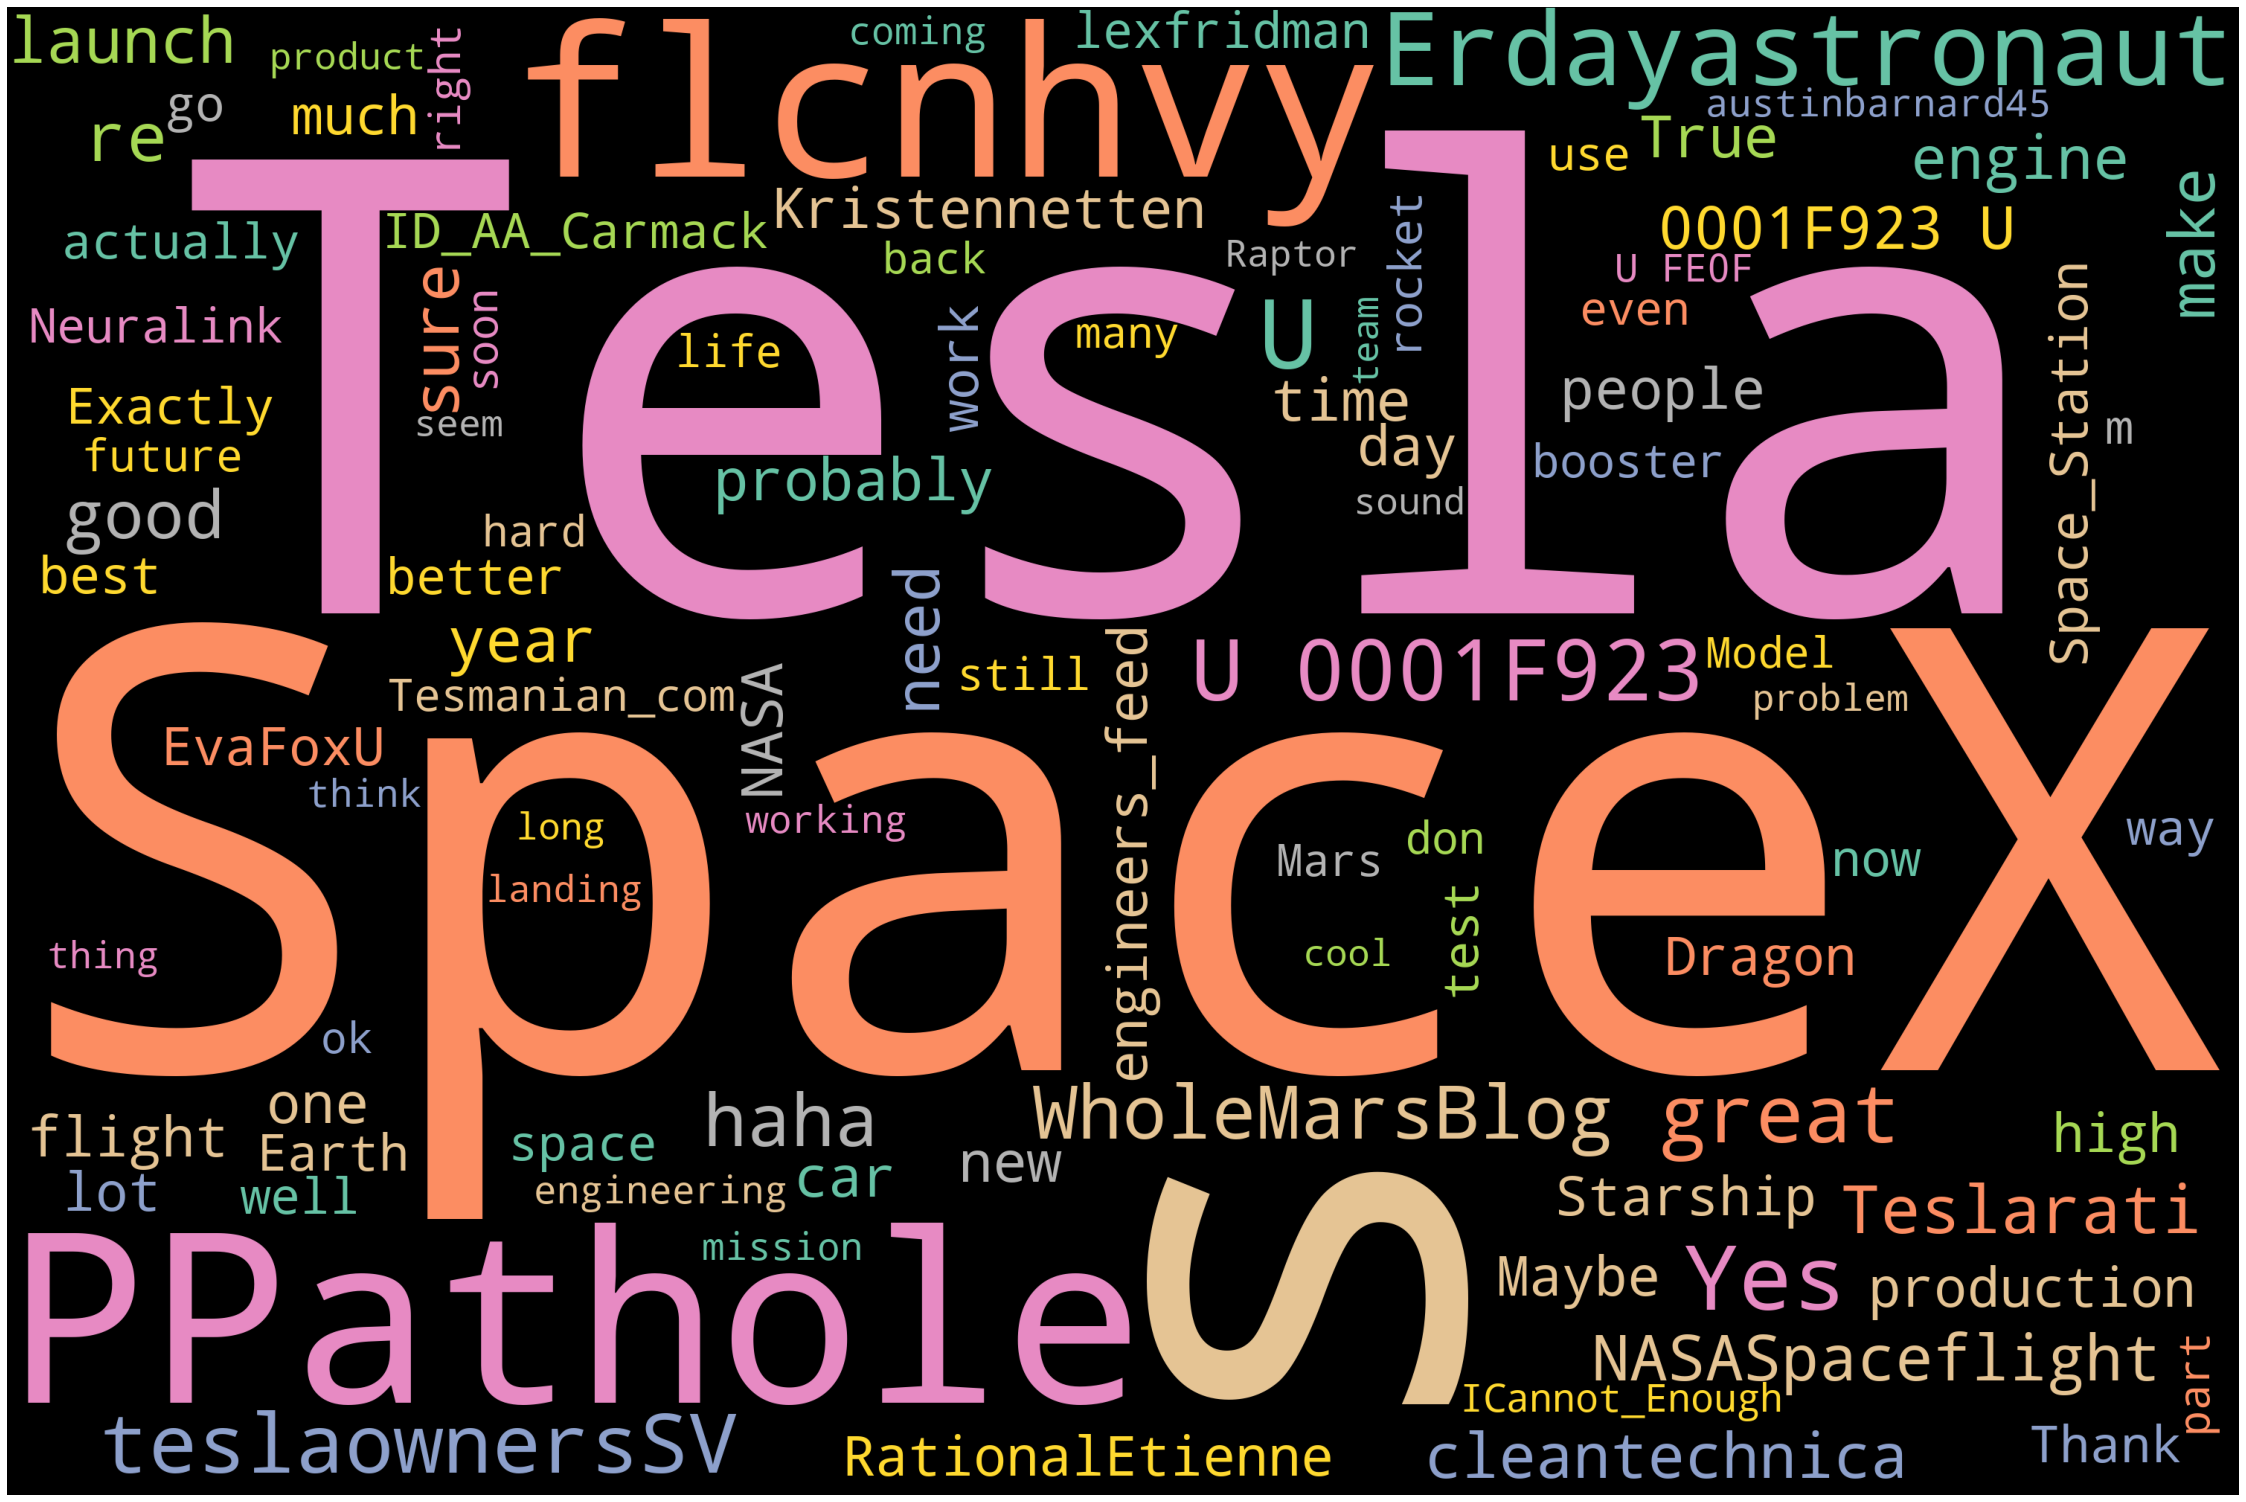

In [42]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')
stopwords.add('https')
stopwords.add('t')
stopwords.add('co')
stopwords.add('amp')
stopwords.add('ye')



wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
pd.set_option('max_colwidth',500)
df.head(10)

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,"Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM"
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.
9,The most entertaining outcome is the most likely


In [ ]:
df['Cleaned_text']=[x.strip()for x in df['Text']]

In [ ]:
df.head(10)

,Text,Cleaned_text
0,@kunalb11 I’m an alien,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,@joerogan @Spotify Great interview!,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,"Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM","Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM"
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.
9,The most entertaining outcome is the most likely,The most entertaining outcome is the most likely


In [ ]:
## Converting to lower case

df['Cleaned_text']=[x.lower()for x in df.Text]
df.head(10)

,Text,Cleaned_text
0,@kunalb11 I’m an alien,@kunalb11 i’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,@id_aa_carmack ray tracing on cyberpunk with hdr is next-level. have you tried it?
2,@joerogan @Spotify Great interview!,@joerogan @spotify great interview!
3,@gtera27 Doge is underestimated,@gtera27 doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,@teslacn congratulations tesla china for amazing execution last year. now on to the next for even more!!
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox! https://t.co/9wfkmyu2oj
6,"Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM","frodo was the underdoge,\nall thought he would fail,\nhimself most of all. https://t.co/zgxjfdzzrm"
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),@owensparks_ @flcnhvy @anonyx10 haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.,@flcnhvy @anonyx10 indeed! tweets definitely do not represent real-world time allocation.
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely


In [ ]:
## Importing RegEx module
import re

In [ ]:
## Removing all urls from text

df['Cleaned_text']=[re.sub(r'http\S+', '',x, flags=re.MULTILINE)for x in df.Cleaned_text]

df.head(10)

,Text,Cleaned_text
0,@kunalb11 I’m an alien,@kunalb11 i’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,@id_aa_carmack ray tracing on cyberpunk with hdr is next-level. have you tried it?
2,@joerogan @Spotify Great interview!,@joerogan @spotify great interview!
3,@gtera27 Doge is underestimated,@gtera27 doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,@teslacn congratulations tesla china for amazing execution last year. now on to the next for even more!!
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox!
6,"Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM","frodo was the underdoge,\nall thought he would fail,\nhimself most of all."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),@owensparks_ @flcnhvy @anonyx10 haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.,@flcnhvy @anonyx10 indeed! tweets definitely do not represent real-world time allocation.
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely


In [ ]:
## Removing twitter handles from text

df['Cleaned_text']=[re.sub('@[^\s]+','',x)for x in df.Cleaned_text]

df.head(10)

,Text,Cleaned_text
0,@kunalb11 I’m an alien,i’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,ray tracing on cyberpunk with hdr is next-level. have you tried it?
2,@joerogan @Spotify Great interview!,great interview!
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,congratulations tesla china for amazing execution last year. now on to the next for even more!!
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox!
6,"Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM","frodo was the underdoge,\nall thought he would fail,\nhimself most of all."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.,indeed! tweets definitely do not represent real-world time allocation.
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely


In [ ]:
## Removing numbers and special characters

df['Cleaned_text']=[re.sub('[^A-Za-z ]+','',x)for x in df.Cleaned_text]

df.head(10)

,Text,Cleaned_text
0,@kunalb11 I’m an alien,im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,ray tracing on cyberpunk with hdr is nextlevel have you tried it
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,congratulations tesla china for amazing execution last year now on to the next for even more
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox
6,"Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM",frodo was the underdogeall thought he would failhimself most of all
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.,indeed tweets definitely do not represent realworld time allocation
9,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely


In [ ]:
## Removing short words of length 3 or less

short = re.compile(r'\W*\b\w{1,3}\b')
df['Cleaned_text']=[short.sub('',x)for x in df.Cleaned_text]

df.head(10)

,Text,Cleaned_text
0,@kunalb11 I’m an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,tracing cyberpunk with nextlevel have tried
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,congratulations tesla china amazing execution last year next even more
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy year
6,"Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM",frodo underdogeall thought would failhimself most
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.,indeed tweets definitely represent realworld time allocation
9,The most entertaining outcome is the most likely,most entertaining outcome most likely


In [ ]:
## Removing StopWords

import nltk
from nltk.corpus import stopwords

## Loading stopwords 
my_stopwords = stopwords.words('english')


In [ ]:
df['Cleaned_text'] = df['Cleaned_text'].apply(lambda x: ' '.join([item for item in x.split() if item not in my_stopwords]))

In [ ]:
df.head(10)

,Text,Cleaned_text
0,@kunalb11 I’m an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,tracing cyberpunk nextlevel tried
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,congratulations tesla china amazing execution last year next even
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy year
6,"Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM",frodo underdogeall thought would failhimself
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),haha thanks
8,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.,indeed tweets definitely represent realworld time allocation
9,The most entertaining outcome is the most likely,entertaining outcome likely


### Lemmatization

In [ ]:
tweets_merge = [x.strip() for x in df.Cleaned_text] # remove both the leading and the trailing characters
tweets_merge

['alien',
 'tracing cyberpunk nextlevel tried',
 'great interview',
 'doge underestimated',
 'congratulations tesla china amazing execution last year next even',
 'happy year',
 'frodo underdogeall thought would failhimself',
 'haha thanks',
 'indeed tweets definitely represent realworld time allocation',
 'entertaining outcome likely',
 'sent',
 'agree clubhouse',
 '',
 'getting real',
 'bought dogecoin toddler hodler',
 'definitely issues sentencing seems high',
 'thanks fixing',
 'please unlock account',
 'ufuf',
 'true power haha',
 'crypto wallet wont give private keys avoided costs',
 'sucks',
 'nasa selected falcon heavy launch first elements lunar gateway together mission',
 '',
 'predict cash flow reasonably well starlink',
 'starlink staggeringly difficult technical economic endeavor however',
 'spacex needs pass deep chasm negative cash flow next year',
 'lowest cost carbon sequestered value product made must scalable',
 'meant price countries difference taxes shipping',
 'i

In [ ]:
tweets_merge = [x for x in tweets_merge if x] # removes empty strings, because they are considered in Python as False
tweets_merge

['alien',
 'tracing cyberpunk nextlevel tried',
 'great interview',
 'doge underestimated',
 'congratulations tesla china amazing execution last year next even',
 'happy year',
 'frodo underdogeall thought would failhimself',
 'haha thanks',
 'indeed tweets definitely represent realworld time allocation',
 'entertaining outcome likely',
 'sent',
 'agree clubhouse',
 'getting real',
 'bought dogecoin toddler hodler',
 'definitely issues sentencing seems high',
 'thanks fixing',
 'please unlock account',
 'ufuf',
 'true power haha',
 'crypto wallet wont give private keys avoided costs',
 'sucks',
 'nasa selected falcon heavy launch first elements lunar gateway together mission',
 'predict cash flow reasonably well starlink',
 'starlink staggeringly difficult technical economic endeavor however',
 'spacex needs pass deep chasm negative cash flow next year',
 'lowest cost carbon sequestered value product made must scalable',
 'meant price countries difference taxes shipping',
 'intended ea

In [ ]:
# Joining the list into one string/text
tweets_merge = ' '.join(tweets_merge)
tweets_merge

'alien tracing cyberpunk nextlevel tried great interview doge underestimated congratulations tesla china amazing execution last year next even happy year frodo underdogeall thought would failhimself haha thanks indeed tweets definitely represent realworld time allocation entertaining outcome likely sent agree clubhouse getting real bought dogecoin toddler hodler definitely issues sentencing seems high thanks fixing please unlock account ufuf true power haha crypto wallet wont give private keys avoided costs sucks nasa selected falcon heavy launch first elements lunar gateway together mission predict cash flow reasonably well starlink starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost carbon sequestered value product made must scalable meant price countries difference taxes shipping intended earth ideas apply mars ufuf xprize team manage carbon capture prize everyone tesla receives stock comp stockopt

In [ ]:
from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

tweet_lemmas = [lemmatizer.lemmatize(t,'v') for t in tweets_merge.split()]
print(tweet_lemmas)

['alien', 'trace', 'cyberpunk', 'nextlevel', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulations', 'tesla', 'china', 'amaze', 'execution', 'last', 'year', 'next', 'even', 'happy', 'year', 'frodo', 'underdogeall', 'think', 'would', 'failhimself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertain', 'outcome', 'likely', 'send', 'agree', 'clubhouse', 'get', 'real', 'buy', 'dogecoin', 'toddler', 'hodler', 'definitely', 'issue', 'sentence', 'seem', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'ufuf', 'true', 'power', 'haha', 'crypto', 'wallet', 'wont', 'give', 'private', 'key', 'avoid', 'cost', 'suck', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'elements', 'lunar', 'gateway', 'together', 'mission', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg

In [ ]:
#import nltk
#nltk.download('wordnet')

## Counting positive and negative opinion words from the corpus supplied

In [ ]:
## loading the positive and negative emotions list
positive_words=pd.read_csv('H:/ExcelR Data Science/datasets_BA/positive-words-edit.txt',sep='delimiter',header=None,engine='python')
negative_words=pd.read_csv('H:/ExcelR Data Science/datasets_BA/negative-words-edit.txt',sep='delimiter',header=None,engine='python')


In [ ]:
positive_words.head()

,0
0,abound
1,abounds
2,abundance
3,abundant
4,accessable


In [ ]:
negative_words.head()

,0
0,2-faced
1,2-faces
2,abnormal
3,abolish
4,abominable


In [ ]:
## stripping white spaces
positive_words = [w.strip() for w in positive_words[0]] 
negative_words = [w.strip() for w in negative_words[0]] 


In [ ]:
print(positive_words[0:10])
print(negative_words[0:10])


['abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade']
['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


In [ ]:
print('Total positive words in supplied corpus:',len(positive_words))
print('Total negative words in supplied corpus:',len(negative_words))


Total positive words in supplied corpus: 2005
Total negative words in supplied corpus: 4783


In [ ]:
positive_list=[]
negative_list=[]
for word in tweet_lemmas:
    if word in positive_words:
        positive_list.append(word)
    if word in negative_words:
        negative_list.append(word)

In [ ]:
print("Total positive words in tweets:",len(positive_list))
print("Total negative words in tweets:",len(negative_list))


Total positive words in tweets: 863
Total negative words in tweets: 428


In [ ]:
from collections import Counter

In [ ]:
pos_f= Counter(positive_list)
print(pos_f)

Counter({'great': 76, 'good': 51, 'work': 49, 'like': 39, 'well': 29, 'thank': 24, 'better': 23, 'right': 23, 'best': 23, 'pretty': 22, 'cool': 21, 'love': 17, 'super': 16, 'support': 14, 'important': 13, 'appreciate': 13, 'fair': 12, 'accurate': 12, 'enough': 11, 'amaze': 10, 'improve': 10, 'improvements': 10, 'congratulations': 9, 'easy': 8, 'progress': 8, 'fast': 8, 'fine': 7, 'awesome': 7, 'worth': 7, 'safe': 7, 'welcome': 6, 'glad': 6, 'impressive': 6, 'happy': 5, 'tough': 5, 'useful': 5, 'approval': 5, 'positive': 5, 'faster': 5, 'favorite': 5, 'clear': 4, 'incredible': 4, 'reliable': 4, 'excite': 4, 'nice': 4, 'successful': 4, 'improvement': 4, 'entertain': 3, 'reasonably': 3, 'correct': 3, 'sensible': 3, 'wise': 3, 'promise': 3, 'success': 3, 'significant': 3, 'ready': 3, 'prize': 2, 'cute': 2, 'destiny': 2, 'warm': 2, 'beautiful': 2, 'exceptionally': 2, 'smart': 2, 'sustainable': 2, 'free': 2, 'proud': 2, 'inspire': 2, 'autonomous': 2, 'capable': 2, 'cure': 2, 'magic': 2, 'qui

In [ ]:
import collections
pos_10=pos_f.most_common(10)
print("Top 10 frequent positive words:\n",pos_10)

Top 10 frequent positive words:
 [('great', 76), ('good', 51), ('work', 49), ('like', 39), ('well', 29), ('thank', 24), ('better', 23), ('right', 23), ('best', 23), ('pretty', 22)]


In [ ]:
type(pos_10)

list

In [ ]:
pos_10=dict(pos_10)
print(pos_10)

{'great': 76, 'good': 51, 'work': 49, 'like': 39, 'well': 29, 'thank': 24, 'better': 23, 'right': 23, 'best': 23, 'pretty': 22}


In [ ]:
neg_f=Counter(negative_list)
print(neg_f)

Counter({'mar': 19, 'hard': 18, 'slow': 11, 'static': 9, 'tank': 8, 'problems': 8, 'sorry': 7, 'cold': 7, 'problem': 6, 'critical': 6, 'irony': 6, 'symptoms': 6, 'lose': 6, 'limit': 6, 'burn': 5, 'wild': 5, 'crazy': 5, 'false': 5, 'issue': 4, 'negative': 4, 'dumb': 4, 'break': 4, 'unfortunately': 4, 'strange': 4, 'blow': 4, 'impossible': 4, 'complex': 4, 'fail': 4, 'suck': 3, 'difficult': 3, 'hang': 3, 'risk': 3, 'hell': 3, 'fallout': 3, 'twist': 3, 'bug': 3, 'wrong': 3, 'incorrect': 3, 'bore': 3, 'abort': 3, 'fear': 3, 'attack': 3, 'loss': 3, 'pain': 2, 'intense': 2, 'scratch': 2, 'foolish': 2, 'weird': 2, 'inevitable': 2, 'trap': 2, 'discord': 2, 'steal': 2, 'suicide': 2, 'fall': 2, 'opposition': 2, 'nightmare': 2, 'knock': 2, 'marginal': 2, 'damn': 2, 'pointless': 2, 'wildly': 2, 'virus': 2, 'decline': 2, 'rumor': 2, 'fault': 2, 'latency': 2, 'trash': 2, 'tension': 2, 'die': 2, 'mistake': 2, 'crash': 2, 'rail': 2, 'insane': 2, 'error': 2, 'jam': 2, 'trivial': 2, 'worst': 2, 'sting':

In [ ]:
neg_10=neg_f.most_common(10)
print("Top 10 frequent negative words:\n",neg_10)

Top 10 frequent negative words:
 [('mar', 19), ('hard', 18), ('slow', 11), ('static', 9), ('tank', 8), ('problems', 8), ('sorry', 7), ('cold', 7), ('problem', 6), ('critical', 6)]


In [ ]:
neg_10=dict(neg_10)
print(neg_10)

{'mar': 19, 'hard': 18, 'slow': 11, 'static': 9, 'tank': 8, 'problems': 8, 'sorry': 7, 'cold': 7, 'problem': 6, 'critical': 6}


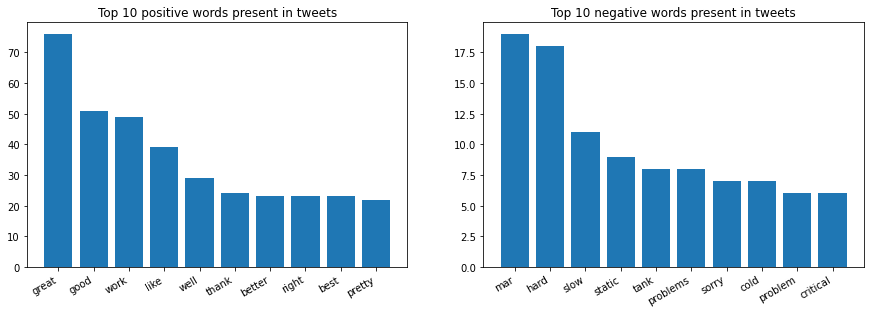

In [ ]:
## Plotting top 10 positive words
fig,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].bar(pos_10.keys(),pos_10.values())
ax[1].bar(neg_10.keys(),neg_10.values())

ax[0].set_title('Top 10 positive words present in tweets')
ax[1].set_title('Top 10 negative words present in tweets')

fig.autofmt_xdate()

plt.show()

In [ ]:
## Combining both positive and negative emotions in a single list
emotion_list=positive_list+negative_list
print(emotion_list[0:15])

['great', 'congratulations', 'amaze', 'happy', 'thank', 'entertain', 'thank', 'reasonably', 'well', 'prize', 'work', 'enough', 'improve', 'work', 'cute']


In [ ]:
## Counting frequency of words in emotion_list
emo_f= Counter(emotion_list)

# First 10 frequent words/emotions
emo_10= emo_f.most_common(10)
print(emo_10)

[('great', 76), ('good', 51), ('work', 49), ('like', 39), ('well', 29), ('thank', 24), ('better', 23), ('right', 23), ('best', 23), ('pretty', 22)]


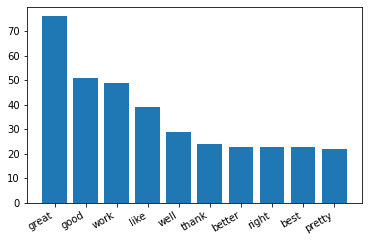

In [ ]:
## Plotting the most frequent words in tweets

# Converting list to dict
emo_10=dict(emo_10)

fig,ax=plt.subplots()

ax.bar(emo_10.keys(),emo_10.values())
fig.autofmt_xdate()
plt.show()

## Using Textblob for sentiment analysis

In [ ]:
from textblob import TextBlob

In [ ]:
type(tweet_lemmas)

list

In [ ]:
tweets_join=' '.join(tweet_lemmas)
tweets_join[0:100]

'alien trace cyberpunk nextlevel try great interview doge underestimate congratulations tesla china a'

In [ ]:
tweet_blob= TextBlob(tweets_join)
tweet_blob.sentiment

Sentiment(polarity=0.19019508106272776, subjectivity=0.5150267444973315)

## Using Vader Sentiment Intensity Analyzer

In [ ]:
#nltk.download('vader_lexicon')

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
si = SentimentIntensityAnalyzer()
sentiment_score = si.polarity_scores(tweets_join)
sentiment_score

{'neg': 0.063, 'neu': 0.657, 'pos': 0.28, 'compound': 1.0}

Both Textblob and Vader shows an overall positive sentiment in tweets.